# Caso Banco “Monopoly/Dormammu”

### Grupo:
- Jehu Aravena 
- Mauricio Parraguez
- Nicolas Montecinos 

Para instalar las librerías, se debe ejecutar el siguiente código en la terminal.

```
pip install -U -r requisitos.txt
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as ms
import matplotlib.pyplot as plt


#  Business Understanding

### Contexto de negocio

Recientemente, el banco Dormammu adquirió el banco Monopoly, que llevaba muchos años atendiendo a los clientes en Chile, el banco Dormammu encargó a sus ingenieros que hicieran un estudio para encontrar patrones y analizar una posible estrategia para dirigirse a los nuevos clientes. Monopoly proporcionó una base de datos al nuevo propietario del banco, y este la compartió con los ingenieros de Dormammu. Los datos proporcionados contienen información de doce meses, con diferentes variables para cada cliente. Estos datos deben ser analizados, limpiados y transformados, y las variables relevantes deben ser seleccionadas para que sirvan para la interpretación y entreguen la información más importante posible. De esta manera, los propietarios del nuevo banco podrán conocer a sus nuevos clientes y construir una estrategia adaptada a este nuevo mercado. El cliente es único, y cada variable es una nueva columna. La base de datos tiene 574 variables y 123.124 filas.

In [2]:
df = pd.read_excel('Base_clientes_Monopoly.xlsx', header=1, index_col=0)


La columna unnamed:574 se ignora debido a que no contiene datos.

In [3]:
df = df.drop('Unnamed: 574', axis=1)


---
---

# Data Understanding

### Gráfico 1


El siguiente gráfico muestra el número de clientes por región. Se observa que la región Metropolitana es la que tiene el mayor número de clientes, seguida de la región del Biobío. Esto permite analizar la distribución de los clientes de manera más general.

13.0    32935
8.0      3768
5.0      3489
10.0     2177
9.0      2143
7.0      1331
2.0      1072
12.0      985
1.0       979
4.0       889
6.0       718
3.0       294
11.0      291
Name: Region, dtype: int64

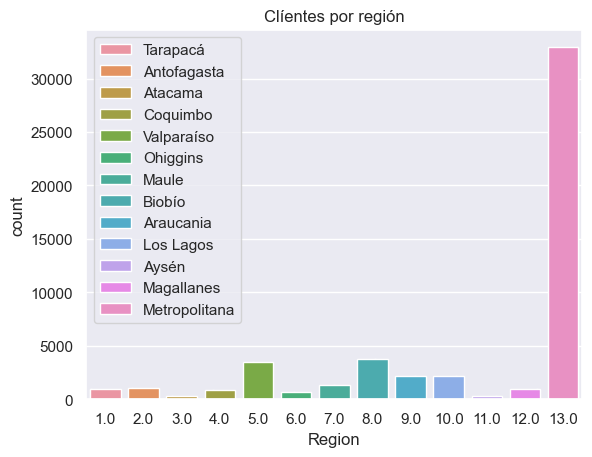

In [4]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Region', data=df, hue="Region").set_title(
    'Clientes por region')
plt.legend(labels=['Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso', 'Ohiggins',
           'Maule', 'Biobío', 'Araucania', 'Los Lagos', 'Aysén', 'Magallanes', 'Metropolitana'])

sns.countplot(x='Region', data=df).set_title('Clíentes por región')

df['Region'].value_counts()


---

### Gráfico 2


El siguiente gráfico de dispersión muestra la correlación entre el monto de las compras con tarjeta de débito en el mes de diciembre versus el número de compras con tarjeta de débito en el mismo mes. Se observa una correlación positiva entre ambas variables. Este análisis muestra la intensidad de la relación entre las dos variables. Pero sin mostrar una causalidad entre ambas variables. Por lo tanto, el gráfico debe ser analizado con discreción.

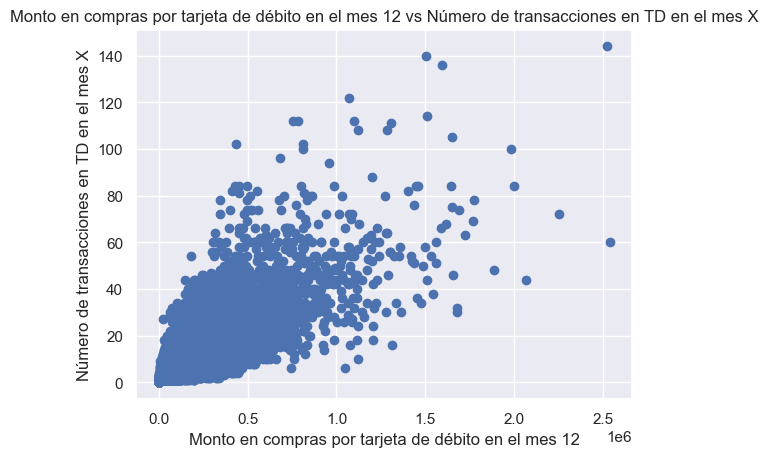

In [5]:
plt.scatter(df['FacDebCom_T12'], df['TxsDebCom_T12'])
plt.xlabel('Monto en compras por tarjeta de débito en el mes 12')
plt.ylabel('Número de transacciones en TD en el mes X')
plt.title('Monto en compras por tarjeta de débito en el mes 12 vs Número de transacciones en TD en el mes X')

plt.show()

---

### Gráfico 3


En este histograma de edades se puede ver el número de clientes por edades. La mayoría de los clientes tienen entre 20 y 40 años, y el rango con menos clientes es de 60 a 80 años y menos de 20 años. La edad mínima es de 9 años y la máxima puede llegar a los 104 años. Estos valores extremos se consideran valores atípicos (outliers).

La tendencia de edad de los clientes es: 27 años
La edad mínima de los clientes es: 9 años
La edad máxima de los clientes es: 104 años


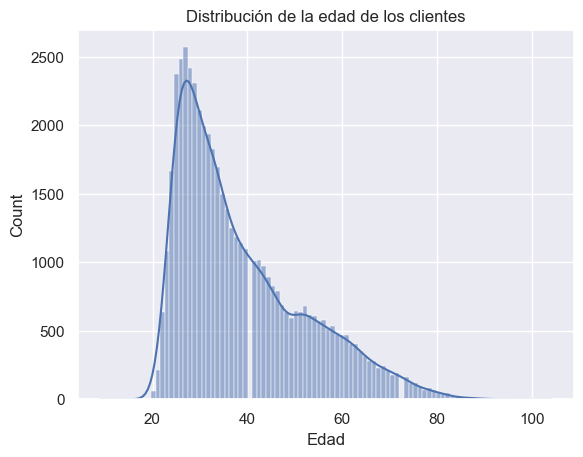

In [6]:
sns.histplot(data=df, x="Edad", kde=True).set_title(
    'Distribución de la edad de los clientes')

print(f'La tendencia de edad de los clientes es: {df["Edad"].mode()[0]} años')

print(f'La edad mínima de los clientes es: {df["Edad"].min()} años')

print(f'La edad máxima de los clientes es: {df["Edad"].max()} años')


---

### Gráfico 4


Este histograma muestra la distribución de la antigüedad de los clientes en meses. Lo primero que se observa es que la tendencia de la antigüedad de los clientes es de 10 meses. La antigüedad mínima de los clientes es de 6 meses y la máxima es de 324 meses, considerándose este último valor como un valor atípico. El histograma muestra cuántos clientes tienen un determinado número de meses de antigüedad. Es más difícil ver clientes con una antigüedad superior a 100 meses.

La tendencia de la antigüedad de los clientes es: 10 meses
La antiguedad mínima de los clientes es: 6 meses
La antiguedad máxima de los clientes es: 324 meses


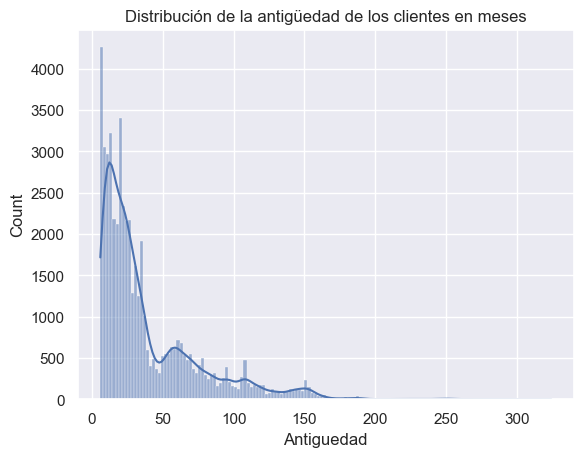

In [7]:
sns.histplot(data=df, x="Antiguedad", kde=True).set_title(
    'Distribución de la antigüedad de los clientes en meses')

print(
    f'La tendencia de la antigüedad de los clientes es: {df["Antiguedad"].mode()[0]} meses')

print(
    f'La antiguedad mínima de los clientes es: {df["Antiguedad"].min()} meses')

print(
    f'La antiguedad máxima de los clientes es: {df["Antiguedad"].max()} meses')


---

### Gráfico 5


El siguiente gráfico de torta muestra el porcentaje de clientes con préstamo hipotecario, ya que sólo el 13,8% de los clientes tiene un préstamo hipotecario, mientras que el 86,2% restante no tiene un préstamo hipotecario. Los totales observables son 7032 clientes con préstamo hipotecario y 44092 clientes sin préstamo hipotecario.

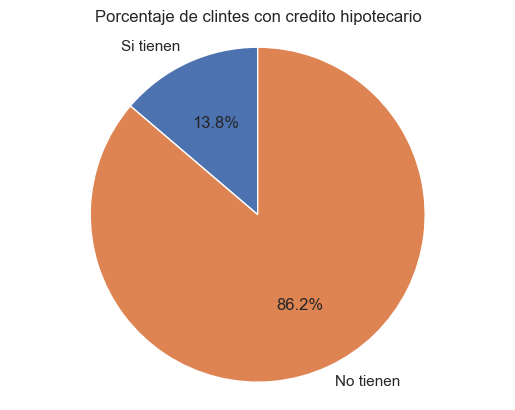

Número total de clientes que tienen un credito hipotecario	: 7032 
Número total de clientes que NO tienen credito hipotecario	: 44092


In [8]:
si = (df["Hipotecario"].value_counts()[1])
no = (df["Hipotecario"].value_counts()[0])

labels = 'Si tienen', 'No tienen'
sizes = [si, no]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Porcentaje de clintes con credito hipotecario')
plt.show()


print(
    f'Número total de clientes que tienen un credito hipotecario\t: {si} \nNúmero total de clientes que NO tienen credito hipotecario\t: {no}')


---

### Gráfico 6

El siguiente histograma muestra la distribución de los datos a partir de dos variables: la variable de la edad en el eje de X y la variable del número de clientes en el eje de Y. Se puede observar que la mayoría de los clientes tienen entre 20 y 40 años. Los colores que se observan representan la suma de las tarjetas de crédito que tienen un determinado número de clientes con una determinada edad. En este caso, el gráfico facilita la interpretación de los datos, ya que se puede observar de forma más clara la distribución de los mismos.


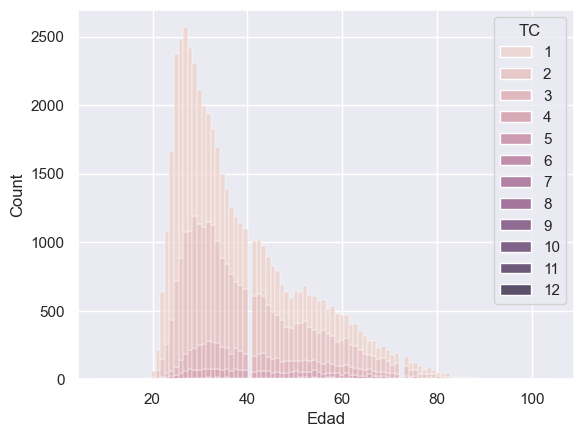

In [9]:
sns.histplot(data=df, x="Edad", hue="TC", multiple="stack")
plt.show()

### Resumen del análisis estadístico
La siguiente tabla muestra un resumen estadístico completo de cada columna de la tabla proporcionada.

In [10]:
df.describe()

,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target
count,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000
mean,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,0.925260,...,4.416549e+04,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977
std,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,0.262974,...,1.081146e+05,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152
min,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,0.000000
25%,160.000000,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,0.000000
50%,170.000000,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,0.000000
75%,210.000000,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,4.270700e+04,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,0.000000
max,959.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.908574e+06,2.072818e+06,8.697782e+06,4.219680e+06,6.911556e+06,3929.810000,6.911556e+06,1.178549e+07,3929.810000,1.000000


---
---

# Metodo Supervisado

# Modelos de Regresión

## Data Preparation

Se crea un dataframe que contiene las columnas a las que se considera que pueden influir en el monto facturado en compras por el cliente en TD (tarjeta de débito) en el mes 12.

In [11]:
df3 = df[['Renta', 'Edad', 'FacDebCom_T12', 'UsoL1_T12', 'Txs_T12', 'FacDebCom_T11',
          'UsoL1_T11', 'Txs_T11', 'FacDebCom_T10', 'UsoL1_T10', 'Txs_T10', 'Debito']]


Esta matriz muestra la correlación entre todas las variables del conjunto de datos df3 que se utiliza para los modelos de regresión. La matriz muestra números decimales, que pueden interpretarse como porcentajes de correlación entre 2 variables. Esto es especialmente importante a la hora de generar modelos de regresión, ya que cuanto mayor sea la correlación entre los datos, más fácil será decidir qué variables utilizar en los modelos.

In [12]:
corr = df3.corr()
corr.style.background_gradient(cmap='YlOrRd')


,Renta,Edad,FacDebCom_T12,UsoL1_T12,Txs_T12,FacDebCom_T11,UsoL1_T11,Txs_T11,FacDebCom_T10,UsoL1_T10,Txs_T10,Debito
Renta,1.000000,0.143001,0.122906,0.100551,0.011122,0.112852,0.097136,0.004827,0.111839,0.099051,0.012730,-0.041375
Edad,0.143001,1.000000,-0.029575,0.197700,0.115308,-0.025438,0.198086,0.110161,-0.031216,0.203617,0.120234,-0.363856
FacDebCom_T12,0.122906,-0.029575,1.000000,-0.009407,-0.070843,0.767858,-0.009478,-0.072295,0.736821,-0.012715,-0.066925,0.159095
UsoL1_T12,0.100551,0.197700,-0.009407,1.000000,0.157575,-0.008543,0.870470,0.086155,-0.004453,0.796292,0.073037,-0.127717
Txs_T12,0.011122,0.115308,-0.070843,0.157575,1.000000,-0.065213,0.164029,0.643378,-0.066356,0.172407,0.548324,-0.124245
FacDebCom_T11,0.112852,-0.025438,0.767858,-0.008543,-0.065213,1.000000,-0.008662,-0.075303,0.758314,-0.011528,-0.069433,0.148094
UsoL1_T11,0.097136,0.198086,-0.009478,0.870470,0.164029,-0.008662,1.000000,0.150645,-0.008125,0.888070,0.083539,-0.130633
Txs_T11,0.004827,0.110161,-0.072295,0.086155,0.643378,-0.075303,0.150645,1.000000,-0.074122,0.164987,0.653099,-0.120676
FacDebCom_T10,0.111839,-0.031216,0.736821,-0.004453,-0.066356,0.758314,-0.008125,-0.074122,1.000000,-0.008033,-0.077020,0.149876
UsoL1_T10,0.099051,0.203617,-0.012715,0.796292,0.172407,-0.011528,0.888070,0.164987,-0.008033,1.000000,0.147092,-0.134493


La variable categórica se divide en dos variables numéricas mediante el método get_dummies

In [13]:
df3 = pd.get_dummies(df3, columns=['Debito'])


Los outliers se procesan estableciendo un límite de edad para los datos (18-90).

In [14]:
df3 = df3[(df3['Edad'] > 18) & (df3['Edad'] < 90)]


Los datos nulos se convierten en 0, ya que "nulo" podría interpretarse como que no hay movimiento.

In [15]:
df3['Renta'] = df3['Renta'].fillna(0)
df3['FacDebCom_T12'] = df3['FacDebCom_T12'].fillna(0)
df3['UsoL1_T12'] = df3['UsoL1_T12'].fillna(0)
df3['Txs_T12'] = df3['Txs_T12'].fillna(0)
df3['FacDebCom_T11'] = df3['FacDebCom_T11'].fillna(0)
df3['UsoL1_T11'] = df3['UsoL1_T11'].fillna(0)
df3['Txs_T11'] = df3['Txs_T11'].fillna(0)
df3['FacDebCom_T10'] = df3['FacDebCom_T10'].fillna(0)
df3['UsoL1_T10'] = df3['UsoL1_T10'].fillna(0)
df3['Txs_T10'] = df3['Txs_T10'].fillna(0)

Se eliminan los datos negativos en la variable UsoL1_TX, ya que no son un porcentaje considerable de datos como para cambiar el resultado de los modelos.

In [16]:
df3 = df3[(df3['UsoL1_T12'] > 0) & (
    df3['UsoL1_T11'] > 0) & (df3['UsoL1_T10'] > 0)]


Los datos del dataset se convierten en numéricos para que los modelos puedan trabajar con ellos.

In [17]:
df3['Renta'] = pd.to_numeric(df3['Renta'], errors='coerce')
df3['Edad'] = pd.to_numeric(df3['Edad'], errors='coerce')
df3['FacDebCom_T12'] = pd.to_numeric(df3['FacDebCom_T12'], errors='coerce')
df3['UsoL1_T12'] = pd.to_numeric(df3['UsoL1_T12'], errors='coerce')

In [18]:
df3

,Renta,Edad,FacDebCom_T12,UsoL1_T12,Txs_T12,FacDebCom_T11,UsoL1_T11,Txs_T11,FacDebCom_T10,UsoL1_T10,Txs_T10,Debito_0,Debito_1
Id,,,,,,,,,,,,,
1,0.0,43,247982.0,731768.0,3.0,167618.0,739270.0,0.0,135506.0,769194.00,2.0,0,1
2,143640.0,46,0.0,244876.0,1.0,0.0,356576.0,8.0,0.0,426159.00,11.0,1,0
3,929106.0,45,52780.0,94415.0,3.0,48258.0,14850.0,4.0,135606.0,6500.00,1.0,0,1
4,172447.0,46,0.0,358807.0,3.0,0.0,347432.0,4.0,0.0,375542.00,1.0,1,0
5,805250.0,46,0.0,67516.0,6.0,0.0,101864.0,12.0,0.0,94019.00,8.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51117,0.0,49,0.0,1655980.0,0.0,0.0,1613688.0,0.0,0.0,1476737.00,1.0,0,1
51118,731321.0,50,0.0,550223.0,0.0,0.0,363771.0,0.0,0.0,121423.00,0.0,1,0
51120,364978.0,51,0.0,549787.0,9.0,0.0,543642.0,8.0,0.0,530489.00,2.0,0,1


Los datos se dividen entre datos de entrenamiento y datos de prueba. 

In [19]:
X2 = df3.drop(['FacDebCom_T12'], axis=1)
y2 = df3['FacDebCom_T12']

X_train2, X_test2, y_train2, y_test2 = ms.train_test_split(
    X2, y2, test_size=0.2, random_state=42)


---
---


## Modeling

### PLSRegression

In [20]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=2)
pls = pls.fit(X_train2, y_train2)
pls_pred = pls.predict(X_test2)

---

#### SGDRegressor

In [21]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgdr = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgdr = sgdr.fit(X_train2, y_train2)
sgdr_pred = sgdr.predict(X_test2)

---

#### MLPRegressor

In [22]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train2, y_train2)
mlp_pred = mlp.predict(X_test2)

---
---

## Evaluation

Con el fin de medir la precisión de los modelos entrenados con anterioridad, se emplean distintos métodos de prueba, dichos métodos retornan un tanto por ciento de precisión de dicho modelo, mientras mayor sea dicho porcentaje, mejor será la precisión del mismo, no obstante no se desea alcanzar la totalidad, pues esto indicaría un overfitting.

Se importan los métodos de evaluación.

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error


El R2 (coeficiente de determinación) nos ayuda a determinar la eficacia del modelo, que indica lo cerca que están los datos de la línea de regresión.

El MAE (Error Medio Absoluto) nos ayuda a medir la diferencia entre los valores reales y los valores predichos.

In [24]:
print('-'*50)
print(f'El R2 del modelo PLS es: {r2_score(y_test2, pls_pred)}')
print(f'El MAE del modelo PLS es: {mean_absolute_error(y_test2, pls_pred)}')
print('-'*50)
print(f'El R2 del modelo SGD es: {r2_score(y_test2, sgdr_pred)}')
print(f'El MAE del modelo SGD es: {mean_absolute_error(y_test2, sgdr_pred)}')
print('-'*50)
print(f'El R2 del modelo MLP es: {r2_score(y_test2, mlp_pred)}')
print(f'El MAE del modelo MLP es: {mean_absolute_error(y_test2, mlp_pred)}')
print('-'*50)


--------------------------------------------------
El R2 del modelo PLS es: 0.6903048682775696
El MAE del modelo PLS es: 35783.181589256616
--------------------------------------------------
El R2 del modelo SGD es: 0.6850139537793238
El MAE del modelo SGD es: 35395.697007091294
--------------------------------------------------
El R2 del modelo MLP es: 0.6773011370067149
El MAE del modelo MLP es: 33885.728969421994
--------------------------------------------------


El modelo que mejor se ajusta a los datos es el modelo PLS, puesto que es el que tiene el menor MAE y el mayor R2, por lo que se puede inferir que es el que mejor predice los datos de la variable FacDebCom_T12 (Importe facturado en compras por el cliente en tarjeta de débito en el mes 12).

---
---

# Modelos de Clasificación

## Data Preparation

Se crea un dataframe que contiene las columnas que se considera que tienen influencia en la predicción sobre a quién se le debe proponer la obtención de un crédito hipotecario.

In [25]:
df2 = df[['Renta', 'CUPO_L1', 'CUPO_MX', 'FacDebCom_T05', 'Hipotecario', 'FacDebCom_T01', 'FacDebCom_T03', 'Ctacte']]


En esta matriz se puede observar que una de las variables más correlacionadas es entre CUPO_L1 y CUPO_MX, variables que se refieren a la cuota de la tarjeta de crédito para compras nacionales e internacionales. A pesar de ello, la variable que más correlaciona con la columna de hipotecas es la de ingresos, por lo que podríamos inferir que un cliente es o no hipotecado en base a sus registros de ingresos. Esto podría llevarnos a pensar que podemos predecir si un cliente es o no titular de una hipoteca en base a la cantidad de ingresos del cliente y a su vez al historial crediticio del mismo, lo que puede estar relacionado con la fiabilidad de dar un préstamo hipotecario a un cliente concreto.

In [26]:
corr = df2.corr()
corr.style.background_gradient(cmap='YlOrRd')

,Renta,CUPO_L1,CUPO_MX,FacDebCom_T05,Hipotecario,FacDebCom_T01,FacDebCom_T03,Ctacte
Renta,1.000000,0.289283,0.275007,0.104849,0.222307,0.107506,0.107174,-0.040247
CUPO_L1,0.289283,1.000000,0.811707,0.152255,0.125601,0.157238,0.154272,-0.089301
CUPO_MX,0.275007,0.811707,1.000000,0.141278,0.103396,0.148020,0.144533,-0.053905
FacDebCom_T05,0.104849,0.152255,0.141278,1.000000,0.100574,0.668973,0.669977,0.119530
Hipotecario,0.222307,0.125601,0.103396,0.100574,1.000000,0.097969,0.097853,0.097521
FacDebCom_T01,0.107506,0.157238,0.148020,0.668973,0.097969,1.000000,0.991106,0.120510
FacDebCom_T03,0.107174,0.154272,0.144533,0.669977,0.097853,0.991106,1.000000,0.117625
Ctacte,-0.040247,-0.089301,-0.053905,0.119530,0.097521,0.120510,0.117625,1.000000


Los datos nulos se convierten en 0, ya que "nulo" podría interpretarse como que no hay movimiento.

In [27]:
df2.loc[df2['Renta'].isnull(), 'Renta'] = 0


El resto de los nulos no se consideran una cantidad considerable como para afectar al rendimiento de los modelos, por lo que estos datos se descartarán.

In [28]:
df2 = df2.dropna()

Los datos del dataset se convierten en numéricos para que los modelos puedan trabajar con ellos.

In [29]:
df2 = df2.astype(float)


In [30]:
df2

,Renta,CUPO_L1,CUPO_MX,FacDebCom_T05,Hipotecario,FacDebCom_T01,FacDebCom_T03,Ctacte
Id,,,,,,,,
1,0.0,798000.0,1210.0,155586.0,0.0,204133.0,204133.0,1.0
2,143640.0,750000.0,1000.0,0.0,1.0,0.0,0.0,1.0
3,929106.0,1350000.0,1500.0,179290.0,1.0,162161.0,162161.0,1.0
4,172447.0,1570800.0,0.0,0.0,0.0,0.0,0.0,0.0
5,805250.0,2762000.0,6430.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
51120,364978.0,999000.0,550.0,0.0,0.0,0.0,0.0,1.0
51121,625376.0,1744200.0,300.0,0.0,0.0,0.0,0.0,1.0
51122,806220.0,1061000.0,1526.0,0.0,0.0,0.0,0.0,1.0


Los datos se dividen entre datos de entrenamiento y datos de prueba, además de equilibrar los datos para evitar sesgar los valores.

In [31]:
from imblearn.over_sampling import SMOTE

X = df2.drop(['Hipotecario'], axis=1)
y = df2['Hipotecario']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = ms.train_test_split(
    X_res, y_res, test_size=0.2, random_state=42)



---
---


## Modeling

### KNeighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

---

### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)


---

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest = forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)


---
---

## Evaluation

Con el fin de medir la precisión de los modelos entrenados con anterioridad, se emplean distintos métodos de prueba, dichos métodos retornan un tanto por ciento de precisión de dicho modelo, mientras mayor sea dicho porcentaje, mejor será la precisión del mismo, no obstante no se desea alcanzar la totalidad, pues esto indicaría un overfitting.

Se importan los métodos de evaluación.

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix


La precisión es la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa.

La recuperación (recall) es la capacidad del clasificador para encontrar todas las muestras positivas

La puntuación F1 puede interpretarse como una media armónica de la precisión y la recuperación

```F1 = 2 * (precision * recall) / (precision + recall)```

La función accuracy_score calcula la exactitud de una fracción de predicciones correctas.

In [36]:
print('-'*50)
print(f'La precisión del modelo KNN es: {precision_score(y_test, knn_pred)}')
print(f'La recuperación del modelo KNN es: {recall_score(y_test, knn_pred)}')
print(f'El F1 del modelo KNN es: {f1_score(y_test, knn_pred)}')
print(f'La exactitud del modelo KNN es: {accuracy_score(y_test, knn_pred)}')
print('-'*50)
print(f'La precisión del modelo DTC es: {precision_score(y_test, dtc_pred)}')
print(f'La recuperación del modelo DTC es: {recall_score(y_test, dtc_pred)}')
print(f'El F1 del modelo DTC es: {f1_score(y_test, dtc_pred)}')
print(f'La exactitud del modelo DTC es: {accuracy_score(y_test, dtc_pred)}')
print('-'*50)
print(f'La precisión del modelo RF es: {precision_score(y_test, forest_pred)}')
print(f'La recuperación del modelo RF es: {recall_score(y_test, forest_pred)}')
print(f'El F1 del modelo RF es: {f1_score(y_test, forest_pred)}')
print(f'La exactitud del modelo RF es: {accuracy_score(y_test, forest_pred)}')
print('-'*50)


--------------------------------------------------
La precisión del modelo KNN es: 0.7493527663246716
La recuperación del modelo KNN es: 0.8897870886940681
El F1 del modelo KNN es: 0.8135540287320425
La exactitud del modelo KNN es: 0.7968005445881552
--------------------------------------------------
La precisión del modelo DTC es: 0.7988231375596758
La recuperación del modelo DTC es: 0.8191961744278721
El F1 del modelo DTC es: 0.8088813940415964
La exactitud del modelo DTC es: 0.8071250283639664
--------------------------------------------------
La precisión del modelo RF es: 0.8319274567692957
La recuperación del modelo RF es: 0.8983263121940112
El F1 del modelo RF es: 0.8638528494005584
La exactitud del modelo RF es: 0.8589176310415249
--------------------------------------------------


In [37]:
print('-'*50)
print('KNN')
print(f'Positivos verdaderos: {confusion_matrix(y_test, knn_pred)[0][0]}')
print(f'Positivos falsos: {confusion_matrix(y_test, knn_pred)[0][1]}')
print(f'Negativos verdaderos: {confusion_matrix(y_test, knn_pred)[1][1]}')
print(f'Negativos falsos: {confusion_matrix(y_test, knn_pred)[1][0]}')
print('-'*50)
print('DTC')
print(f'Positivos verdaderos: {confusion_matrix(y_test, dtc_pred)[0][0]}')
print(f'Positivos falsos: {confusion_matrix(y_test, dtc_pred)[0][1]}')
print(f'Negativos verdaderos: {confusion_matrix(y_test, dtc_pred)[1][1]}')
print(f'Negativos falsos: {confusion_matrix(y_test, dtc_pred)[1][0]}')
print('-'*50)
print('RF')
print(f'Positivos verdaderos: {confusion_matrix(y_test, forest_pred)[0][0]}')
print(f'Positivos falsos: {confusion_matrix(y_test, forest_pred)[0][1]}')
print(f'Negativos verdaderos: {confusion_matrix(y_test, forest_pred)[1][1]}')
print(f'Negativos falsos: {confusion_matrix(y_test, forest_pred)[1][0]}')
print('-'*50)


--------------------------------------------------
KNN
Positivos verdaderos: 6231
Positivos falsos: 2614
Negativos verdaderos: 7815
Negativos falsos: 968
--------------------------------------------------
DTC
Positivos verdaderos: 7033
Positivos falsos: 1812
Negativos verdaderos: 7195
Negativos falsos: 1588
--------------------------------------------------
RF
Positivos verdaderos: 7251
Positivos falsos: 1594
Negativos verdaderos: 7890
Negativos falsos: 893
--------------------------------------------------


El mejor modelo es el de Random Forest porque tiene la mejor F1 y la mejor precisión, por lo que se puede decir que es el que mejor predice los datos

---
---

# Metodo No Supervisado

## Data Preparation

Se crea un dataframe que contiene las columnas que se considera que tienen influencia en la predicción sobre a quién se le debe proponer la obtención de un crédito hipotecario.

In [38]:
df4 = df[['Region', 'TC', 'FlgActPAT_T05', 'FlgActPAT_T07', 'FlgActPAT_T10', 'FlgActPAT_T12']]


En la siguiente matriz de correlación, podemos observar que la variable más relacionada con nuestra variable predictora sería la tenencia de la tarjeta de crédito, seguida de la suma de actividad por mes en la tarjeta de crédito del cliente para x mes específico. Basándonos en esto, podemos especular en principio 2 cosas. La primera es que ciertas regiones tienen una mayor concentración de clientes, y esto aumenta la probabilidad de poseer una tarjeta de crédito. La segunda se basa en la actividad de las tarjetas de crédito, que podría hablar de un mayor número de sucursales bancarias, o de sucursales comerciales, por lo que la mayor actividad se concentraría en lugares más urbanos, o, por el contrario, en determinadas regiones hay más actividad crediticia por parte de los clientes.

In [39]:
corr = df4.corr()
corr.style.background_gradient(cmap='YlOrRd')

,Region,TC,FlgActPAT_T05,FlgActPAT_T07,FlgActPAT_T10,FlgActPAT_T12
Region,1.000000,0.069545,0.064742,0.064577,0.062220,0.061935
TC,0.069545,1.000000,0.075521,0.072510,0.079564,0.084963
FlgActPAT_T05,0.064742,0.075521,1.000000,0.887326,0.821649,0.773179
FlgActPAT_T07,0.064577,0.072510,0.887326,1.000000,0.864592,0.811410
FlgActPAT_T10,0.062220,0.079564,0.821649,0.864592,1.000000,0.890663
FlgActPAT_T12,0.061935,0.084963,0.773179,0.811410,0.890663,1.000000


Los datos nulos de la columna "Región" no suman una cantidad considerable como para afectar al rendimiento de los modelos, por lo que se decidió descartarlos.

In [40]:
df4 = df4.dropna(subset=['Region'])

Los datos nulos se convierten en 0, ya que "nulo" podría interpretarse como que no hay movimiento.

In [41]:
df4 = df4.fillna(0)

Los datos del dataset se convierten en numéricos para que los modelos puedan trabajar con ellos.

In [42]:
df4 = df4.astype(float)


In [43]:
df4

,Region,TC,FlgActPAT_T05,FlgActPAT_T07,FlgActPAT_T10,FlgActPAT_T12
Id,,,,,,
1,13.0,3.0,0.0,0.0,0.0,0.0
2,13.0,1.0,0.0,0.0,0.0,0.0
3,13.0,2.0,0.0,0.0,0.0,0.0
4,13.0,2.0,0.0,0.0,0.0,0.0
5,13.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
51120,13.0,3.0,0.0,0.0,0.0,0.0
51121,13.0,1.0,1.0,1.0,1.0,1.0
51122,13.0,2.0,0.0,0.0,0.0,0.0


Los datos se dividen entre datos de entrenamiento y datos de prueba.

In [44]:
from imblearn.over_sampling import SMOTE

X = df4.drop(['Region'], axis=1)
y = df4['Region']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = ms.train_test_split(
    X_res, y_res, test_size=0.2, random_state=42)


---
---


## Modeling

### Spectral Co-Clustering

In [45]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=5)
birch = birch.fit(X_train, y_train)
birch_pred = birch.predict(X_test)


---

### K-means

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans = kmeans.fit(X_train, y_train)
kmeans_pred = kmeans.predict(X_test)


---
---

## Evaluation

Con el fin de medir la precisión de los modelos entrenados con anterioridad, se emplean distintos métodos de prueba, dichos métodos retornan un tanto por ciento de precisión de dicho modelo, mientras mayor sea dicho porcentaje, mejor será la precisión del mismo, no obstante no se desea alcanzar la totalidad, pues esto indicaría un overfitting.

Se importan los métodos de evaluación.

In [47]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

El Coeficiente de Silueta (silhouette_score) para un conjunto de muestras se da como la media del Coeficiente de Silueta para cada muestra.


El mejor valor es 1 y el peor es -1. Los valores cercanos a 0 indican que los clusters se solapan. Los valores negativos suelen indicar que una muestra ha sido asignada al clúster equivocado, ya que otro clúster es más similar.

La puntuación de calinski harabasz se define como el cociente de la suma de la dispersión entre clusters y de la dispersión dentro de clusters.

La puntuación de Davies Bouldin (davies_bouldin_score) se define como la medida de similitud media de cada clúster con su clúster más similar, donde la similitud es la relación entre las distancias dentro de los clústeres y las distancias entre ellos. Así, los clusters más alejados y menos dispersos tendrán una mejor puntuación.

In [48]:
print('-'*50)
print(f'El silhouette del modelo Birch es: {silhouette_score(X_test, birch_pred)}')
print(f'El calinski_harabasz del modelo Birch es: {calinski_harabasz_score(X_test, birch_pred)}')
print(f'El davies_bouldin del modelo Birch es: {davies_bouldin_score(X_test, birch_pred)}')
print('-'*50)
print(f'El silhouette del modelo Kmeans es: {silhouette_score(X_test, kmeans_pred)}')
print(f'El calinski_harabasz del modelo Kmeans es: {calinski_harabasz_score(X_test, kmeans_pred)}')
print(f'El davies_bouldin del modelo Kmeans es: {davies_bouldin_score(X_test, kmeans_pred)}')
print('-'*50)

print('El modelo Kmeans es mejor que el modelo Birch')

--------------------------------------------------
El silhouette del modelo Birch es: 0.5734735187747343
El calinski_harabasz del modelo Birch es: 21090.815542351433
El davies_bouldin del modelo Birch es: 0.553120234393368
--------------------------------------------------
El silhouette del modelo Kmeans es: 0.880567038659739
El calinski_harabasz del modelo Kmeans es: 146149.7894124622
El davies_bouldin del modelo Kmeans es: 0.5395733354212467
--------------------------------------------------
El modelo Kmeans es mejor que el modelo Birch


---
---

# Conclusión

El uso del aprendizaje automático ayudará a la empresa a conocer mejor los intereses de sus clientes, gracias a la aplicación de modelos de aprendizaje supervisado y no supervisado, podemos ver cuáles son útiles para cada tipo de datos.

Entendimos que el desequilibrio de los datos puede generar una pérdida de precisión en los modelos. Para solucionar esto, utilizamos una herramienta llamada SMOTE. 
Aprendimos que la importancia de las matrices de correlación puede crear una guía para poder seleccionar qué variables afectarán más a nuestra predicción. También aprendimos que el uso correcto de los gráficos puede darnos más claridad para analizar el uso de las variables y la comprensión de las mismas. Nos dimos cuenta del uso de las métricas de los diferentes modelos y qué modelos nos pueden ayudar más o menos dependiendo del contexto del caso y de la precisión de estos modelos.